# Titanic Dataset Solution

### There are three primary goals of this notebook.

1) Do a statistical analysis of how some group of people survived more than the others.
2) Do an exploratory data analysis(EDA) of titanic dataset with visualizations.
3) Predict: Use machine learning classification models to predict the chances of a passengers' survival.

# Importing Necessary Libraries

In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from time import perf_counter
tick = perf_counter()
%matplotlib inline 

# Importing the Dataset

In [137]:
train = pd.read_csv(r"C:\Projects\Ventive Titanic EDA\train.csv")
test = pd.read_csv(r"C:\Projects\Ventive Titanic EDA\test.csv")

# About the Dataset

In [138]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [139]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
print ("The shape of the train data is (row, column):"+ str(train.shape))
print (train.info())

The shape of the train data is (row, column):(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [141]:
print ("The shape of the test data is (row, column):"+ str(test.shape))
print (test.info())

The shape of the test data is (row, column):(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Now let's go through the features and describe a little. There is a couple of different type of variables, They are...

Categorical:

1) Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

a) Cabin
b) Embarked(Port of Embarkation)
    i)   C(Cherbourg)
    ii)  Q(Queenstown) 
    iii) S(Southampton)
    
2) Dichotomous(Nominal variable with only two categories)

a) Sex
    i)  Female
    ii) Male

3) Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)
a) Pclass (A proxy for socio-economic status (SES))
    i)   1(Upper)
    ii)  2(Middle) 
    iii) 3(Lower)

4) Numeric:

a) Discrete
    i)   Passenger ID(Unique identifing # for each passenger)
    ii)  SibSp
    iii) Parch
    iv)  Survived (Our outcome or dependent variable)
   
b) Continous
    i)  Age
    ii) Fare


5) Text Variable

    i)  Ticket (Ticket number for passenger.)
    ii) Name( Name of the passenger.)


# Overview and Cleaning the Data¶

Datasets in the real world are often messy, However, this dataset is almost clean. Lets analyze and see what we have here.

In [142]:
## We will drop PassengerID and Ticket since it will be useless for our data. 

In [143]:
passengerid = test.PassengerId

In [144]:
#train.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)
#test.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)

# Dealing with Missing values

In [145]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [146]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [147]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


### Embarked Feature

In [148]:
total = train.value_counts("Embarked", dropna = False).sort_values(ascending = False)
percent = round(total*100/len(train),2)
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [149]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We may be able to solve these two missing values by looking at other independent variables of the two raws.

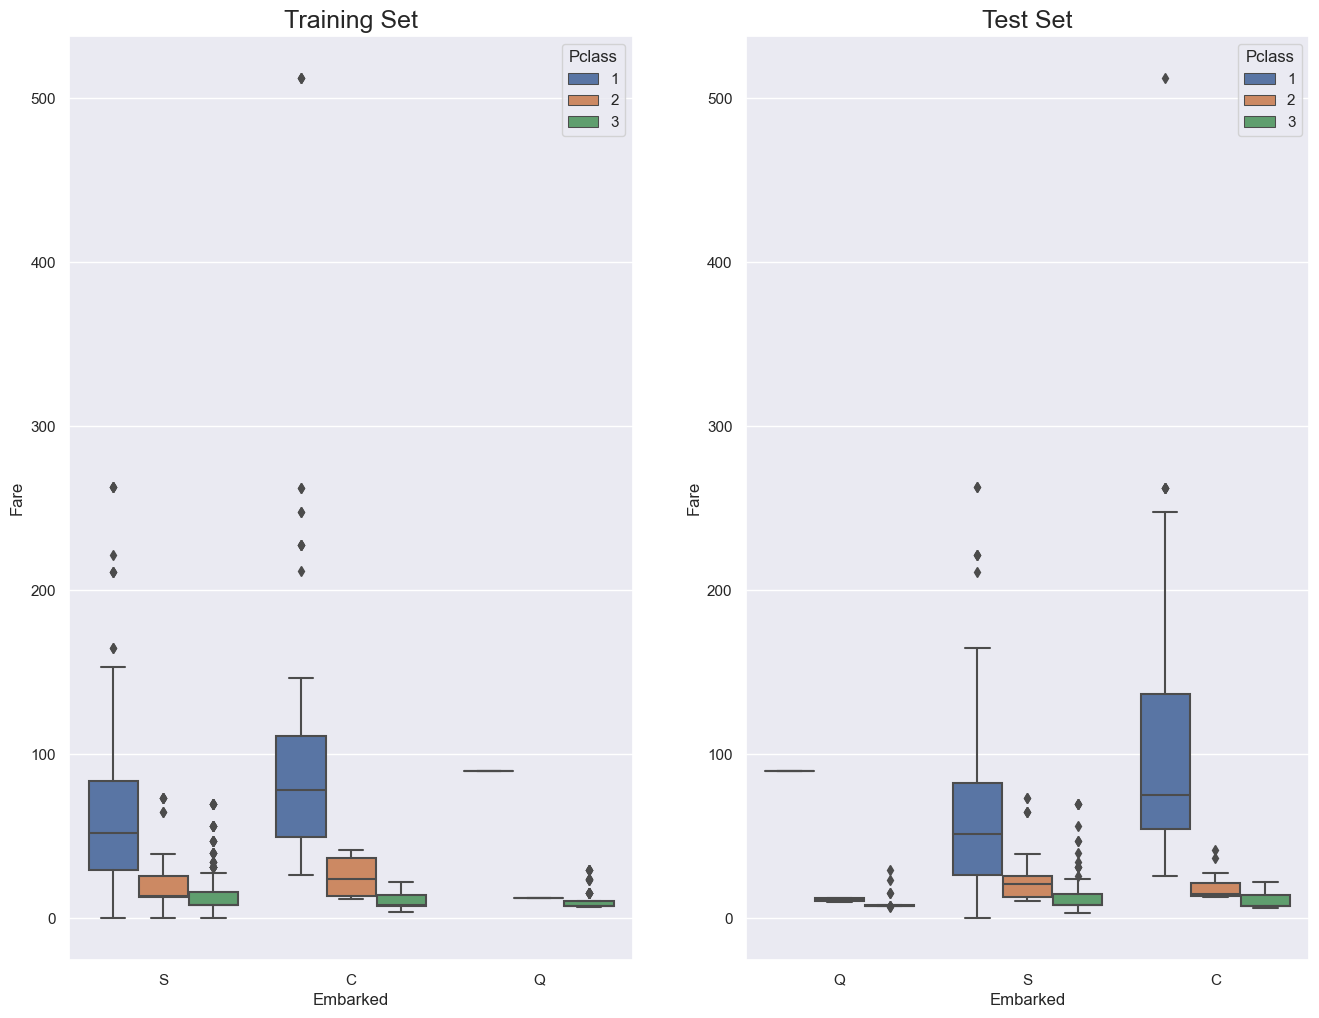

In [150]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18);

Here, in both training set and test set, the average fare closest to $80 are in the C Embarked values where pclass is 1. So, let's fill in the missing values as "C"

In [151]:
train["Embarked"].fillna("C", inplace = True)

### Cabin Feature

Approximately 77% of Cabin feature is missing in the training data and 78% missing on the test data. We have two choices,

1) we can either get rid of the whole feature, or
2) we can brainstorm a little and find an appropriate way to put them in use. For example, We may say passengers with        cabin record had a higher socio-economic-status then others. We may also say passengers with cabin record were more        likely to be taken into consideration when loading into the boat.

All the cabin names start with an English alphabet following by multiple digits. It seems like there are some passengers that had booked multiple cabin rooms in their name. This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.

In [152]:
survivers = train.Survived
train.drop(['Survived'], axis = 1, inplace = True)
all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [153]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [154]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [155]:
per = round((all_data.Cabin.value_counts()/len(all_data)).to_frame(), 2)
per

,Cabin
N,0.77
C,0.07
B,0.05
D,0.04
E,0.03
A,0.02
F,0.02
G,0.00
T,0.00


We can use the average of the fare column and we can use python's groupby function to get the mean fare of each cabin letter.

In [156]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

Now, these means can help us determine the unknown cabins, if we compare each unknown cabin rows with the given mean's above. Let's write a simple function so that we can give cabin names based on the means.

Let's apply cabin_estimator function in each unknown cabins(cabin with null values). Once that is done we will separate our train and test to continue towards machine learning modeling.

In [157]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [158]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [159]:
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\758010233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))


In [160]:
all_data = pd.concat([with_N, without_N], axis=0)

In [161]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C,Q


In [162]:
all_data.sort_values(by = 'PassengerId', inplace=True)

In [163]:
train = all_data[:891]

test = all_data[891:]
train['Survived'] = survivers

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\876170988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = survivers


Fare Feature

In [164]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [165]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
missing_value

12.718872

In [166]:
test.Fare.fillna(missing_value, inplace = True)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Age Feature

We know that the feature "Age" is the one with most missing values, let's see it in terms of percentage. We will work on Age feature in feature engineering section.



# Visualization and Feature Relations

Assumptions:

Gender: More female survived than male
Pclass: Higher socio-economic status passenger survived more than others.
Age: Younger passenger survived more than other passengers.
Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass.
Now, let's see how the features are related to each other by creating some visualizations.

## Gender and Survived

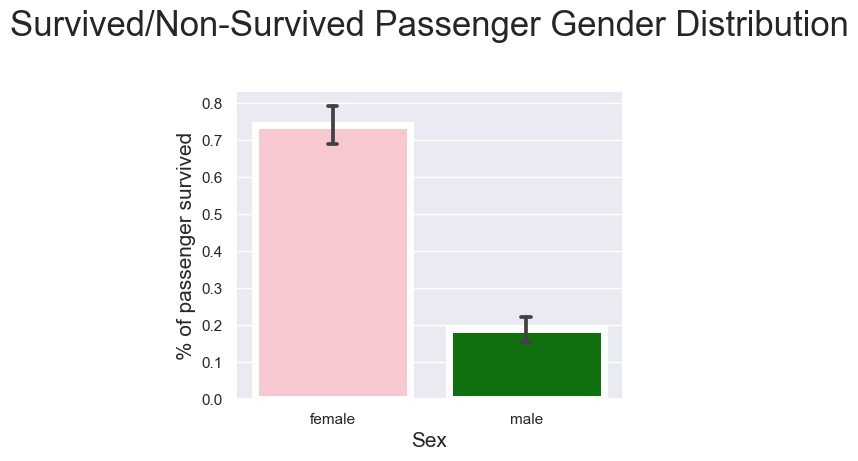

In [167]:
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (5,4))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

This bar plot above shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. This bar plot shows that ~74% female passenger survived while only ~19% male passenger survived.

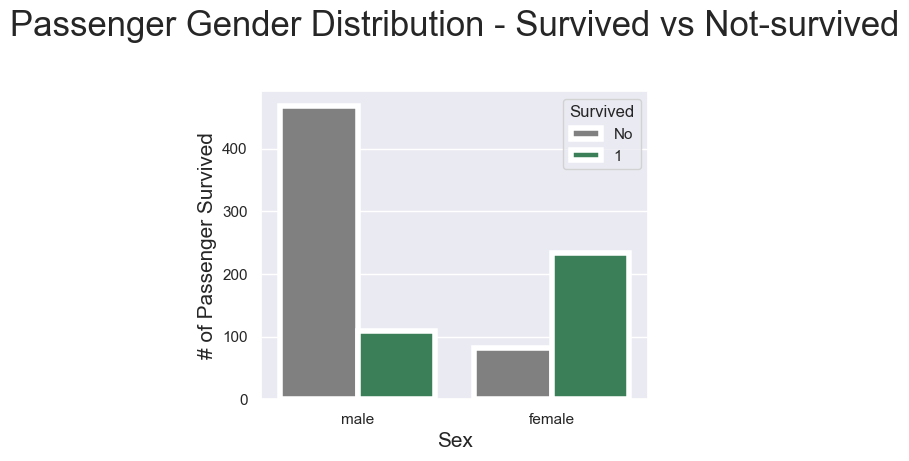

In [168]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (5,4))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")

## Pclass and Survived

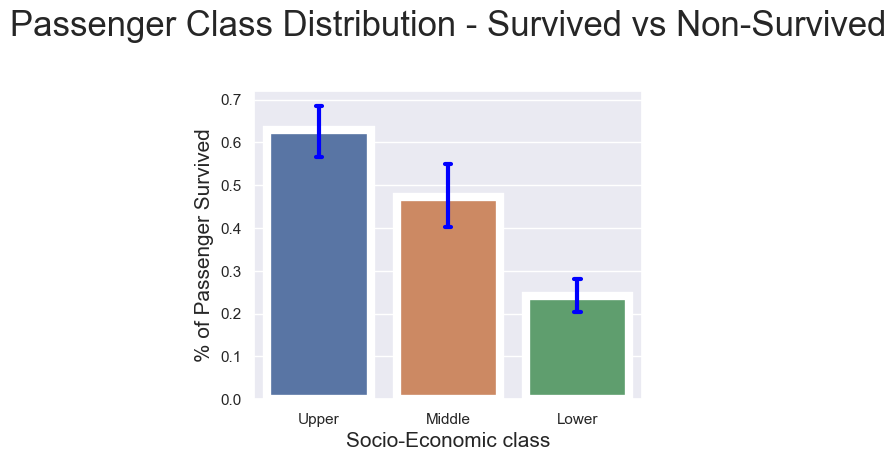

In [169]:
plt.subplots(figsize = (5,4))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);


## Fare and Survived

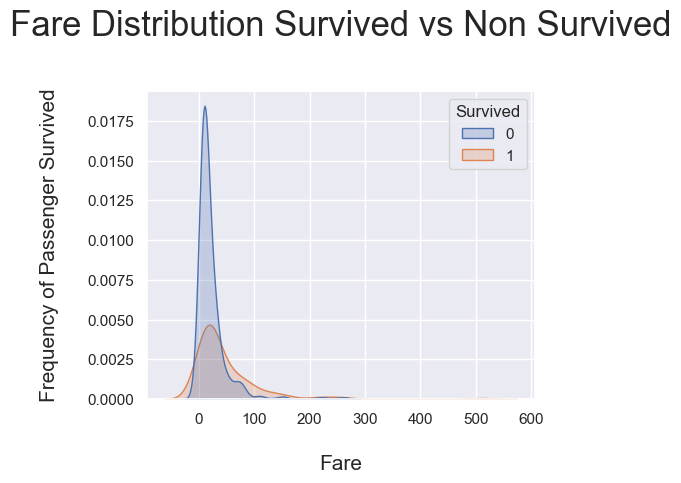

In [170]:
# Kernel Density Plot
fig = plt.figure(figsize=(5,4))
# ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived', legend=True)
# ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived', legend=True)
ax=sns.kdeplot(data = train, x = 'Fare', hue = 'Survived', color='g',shade=True)
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20)

## Fixing legends
leg = ax.get_legend()
# leg.set_title("Survived")
# legs = leg.texts
# legs[0].set_text("No")

In [171]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will keep it for now.

## Age and Survived

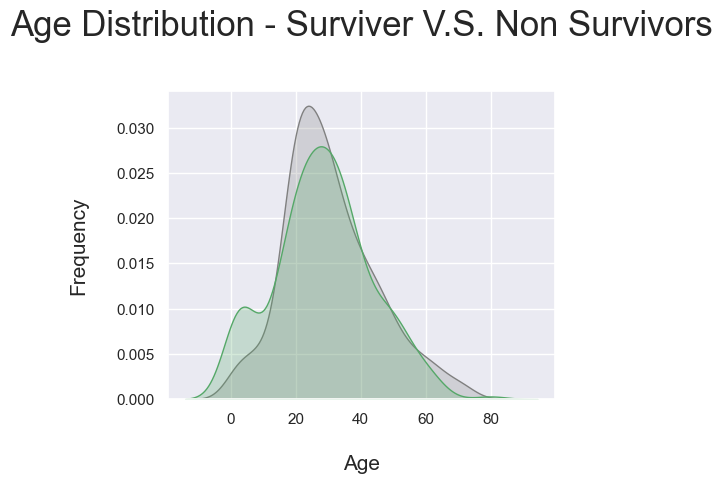

In [172]:
# Kernel Density Plot
fig = plt.figure(figsize=(5,4),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True, label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

There is nothing out of the ordinary about this plot, except the very left part of the distribution. This may hint on the posibility that children and infants were the priority.

## Combined Feature Relations

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


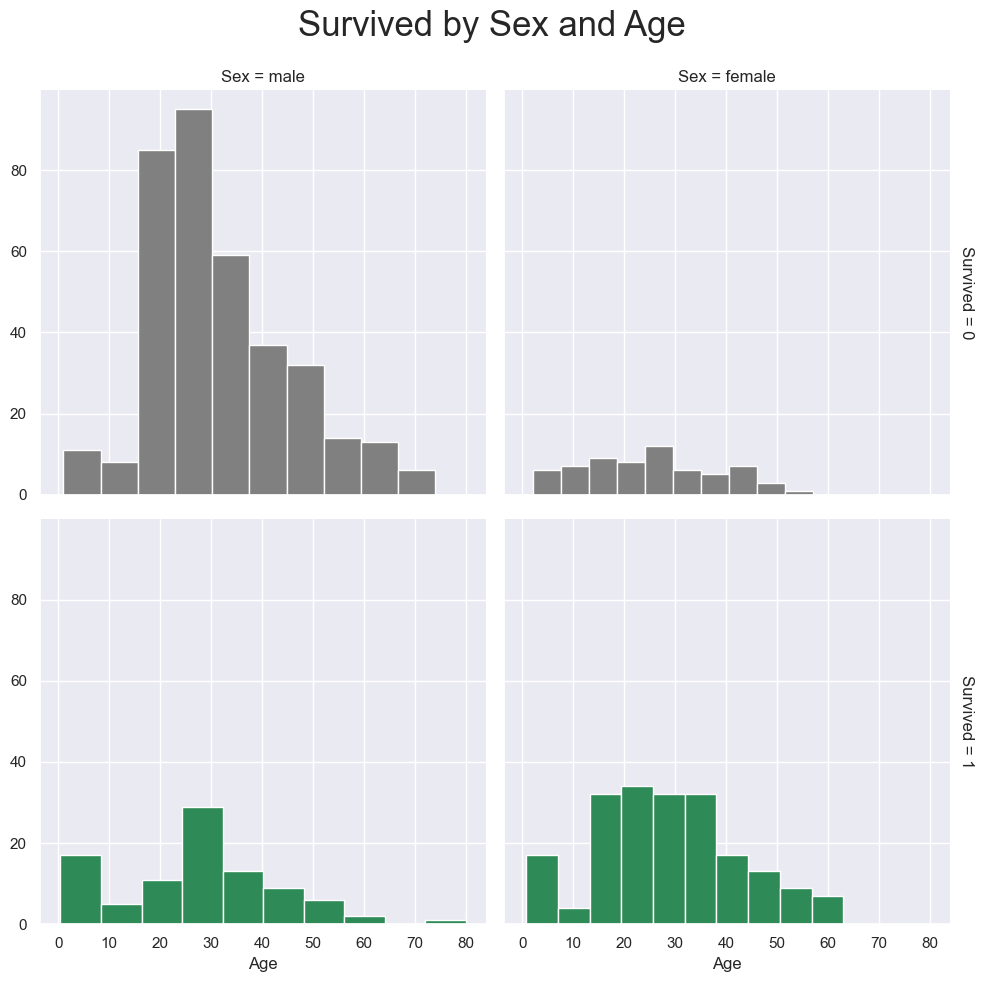

In [173]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


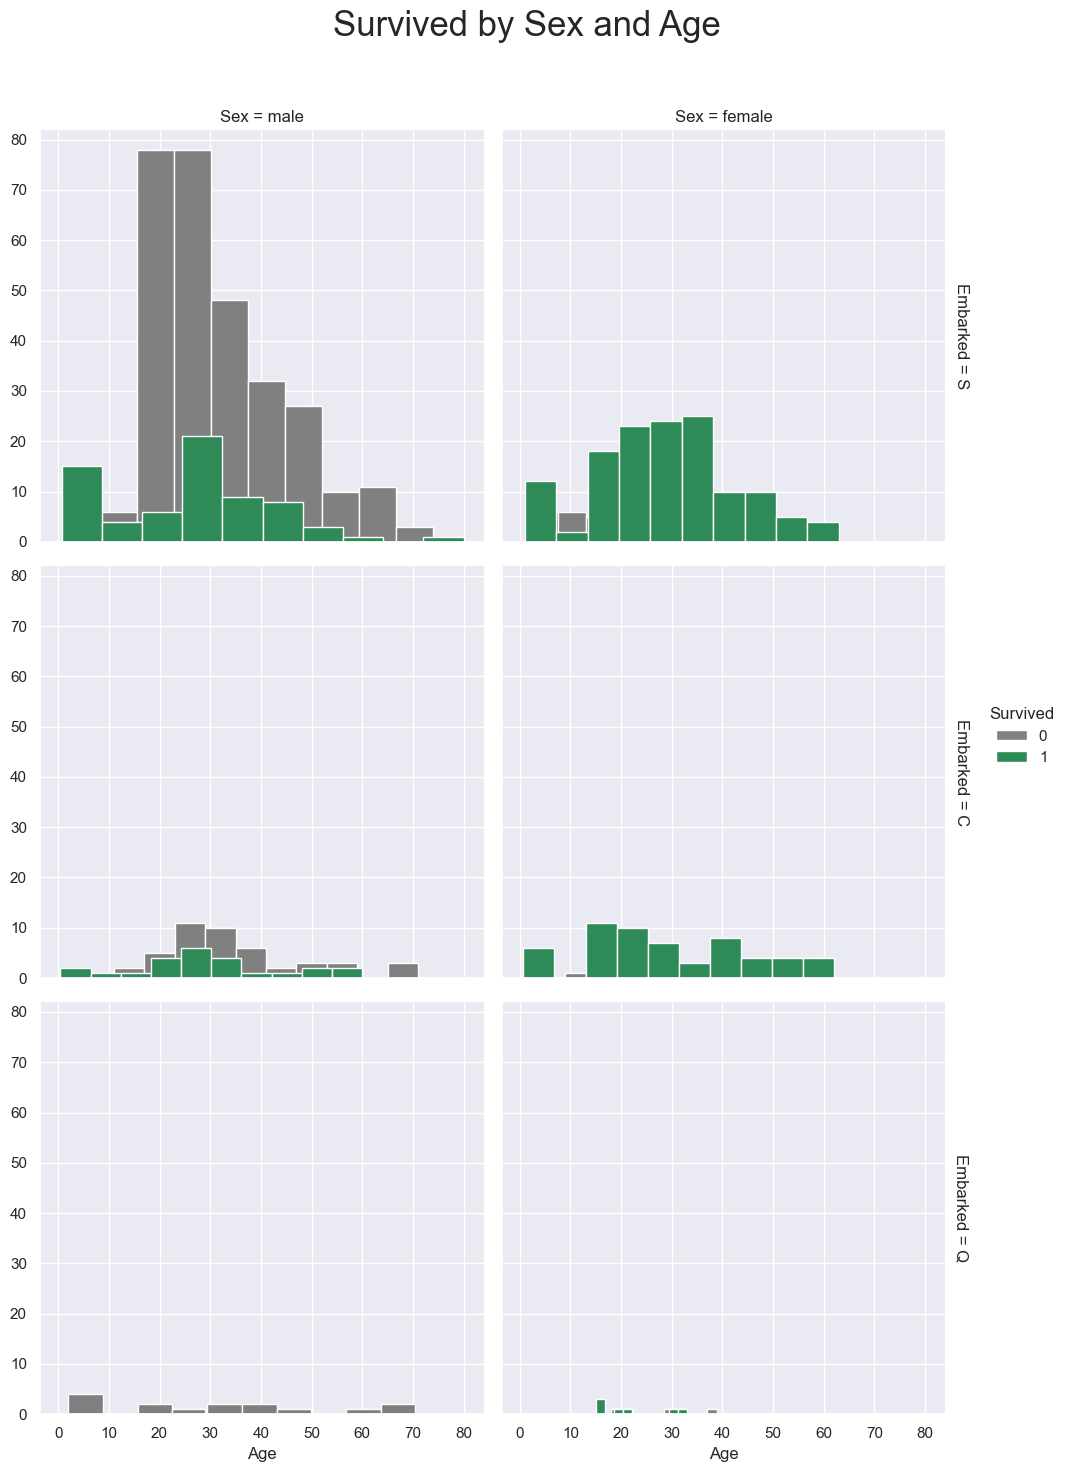

In [174]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data.

- Most passengers seem to be boarded on Southampton(S).
- More than 60% of the passengers died boarded on Southampton.
- More than 60% of the passengers lived boarded on Cherbourg(C).
- Pretty much every male that boarded on Queenstown(Q) did not survive.
- There were very few females boarded on Queenstown, however, most of them survived.

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


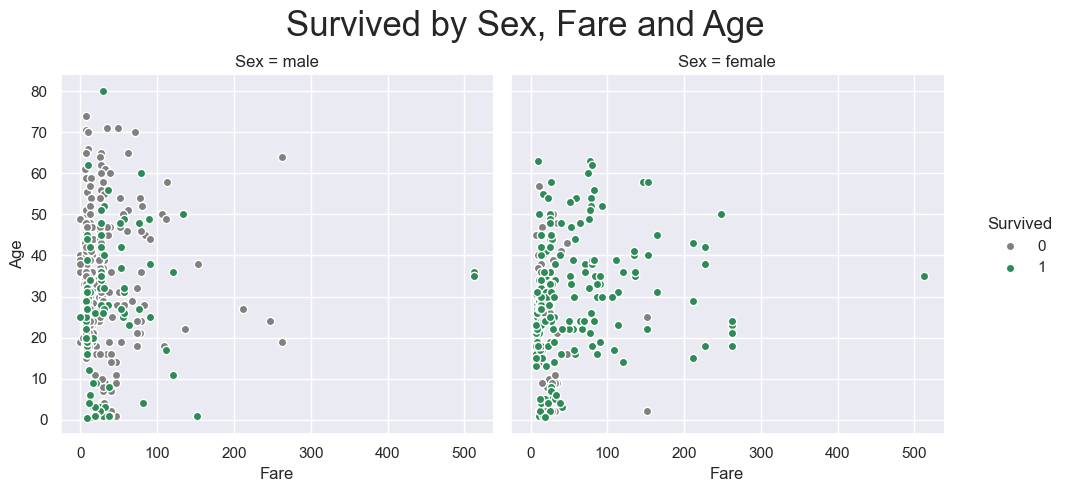

In [175]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

This facet grid unveils a couple of interesting insights. Let's find out.

The grid above clearly demonstrates the three outliers with Fare of over 500. At this point, I think we are quite confident that these outliers should be deleted.
Most of the passengers were with in the Fare range of $100.

In [176]:
train.shape

(891, 12)

In [177]:
train = train[train.Fare < 500]

In [178]:
train.shape

(888, 12)

In [179]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S,0


C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


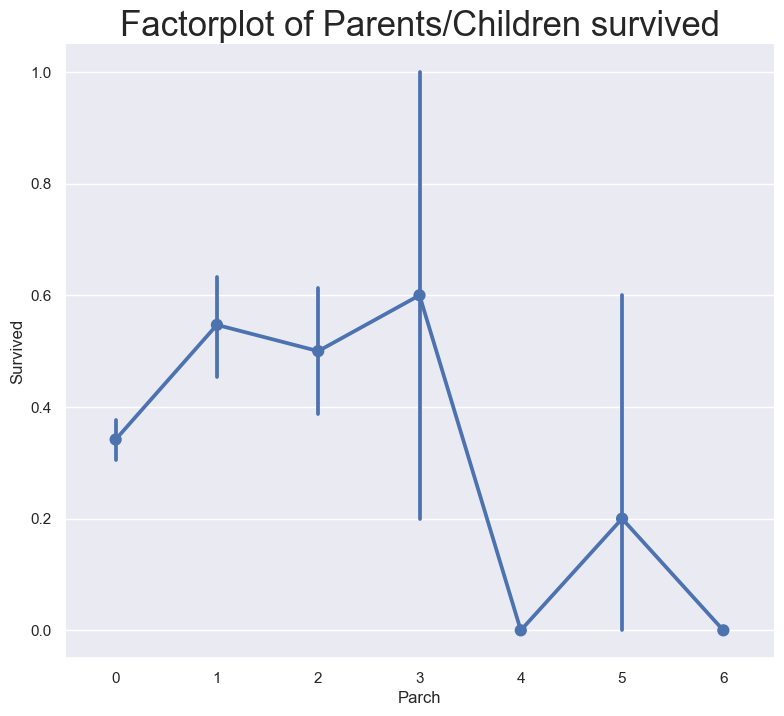

In [180]:
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

# Statistical Overview

In [181]:
train["Sex"].replace({"male":1, "female":0}, inplace = True)
test["Sex"].replace({"male":1, "female":0}, inplace = True)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [182]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [183]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Braund, Mr. Owen Harris",347082,G,S
freq,1,7,464,644


In [184]:
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [185]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [186]:
survived_summary = train.groupby('Pclass')
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


I have gathered a small summary from the statistical overview above. Let's see what they are...

- This train data set has 891 raw and 9 columns.
- only 38% passenger survived during that tragedy.
- ~74% female passenger survived, while only ~19% male passenger survived.
- ~63% first class passengers survived, while only 24% lower class passenger survived.

## Correlation Matrix and Heatmap

In [187]:
train.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.033005,0.040265,0.036181,-0.056929,-0.002223,-0.002046,-0.006916
Pclass,-0.033005,1.000000,0.132881,-0.368625,0.080937,0.018212,-0.604960,-0.334068
Sex,0.040265,0.132881,1.000000,0.093296,-0.114799,-0.247003,-0.222361,-0.545899
Age,0.036181,-0.368625,0.093296,1.000000,-0.307639,-0.189194,0.100396,-0.079472
SibSp,-0.056929,0.080937,-0.114799,-0.307639,1.000000,0.415141,0.211816,-0.033395
Parch,-0.002223,0.018212,-0.247003,-0.189194,0.415141,1.000000,0.263910,0.082157
Fare,-0.002046,-0.604960,-0.222361,0.100396,0.211816,0.263910,1.000000,0.261742
Survived,-0.006916,-0.334068,-0.545899,-0.079472,-0.033395,0.082157,0.261742,1.000000


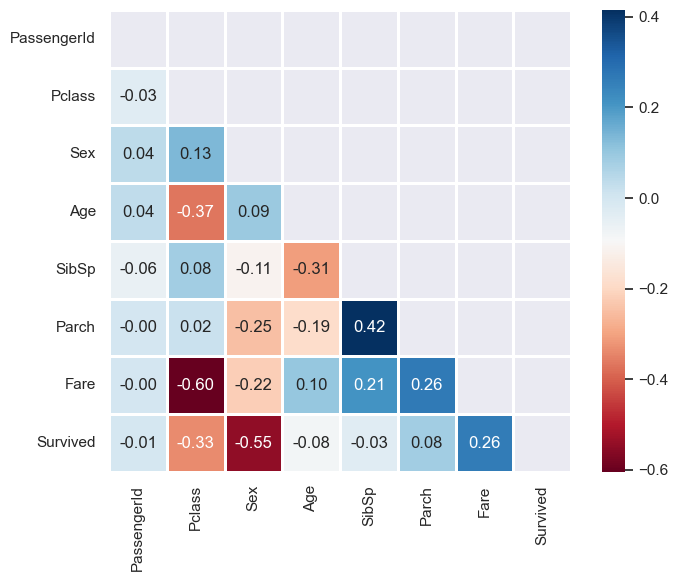

In [188]:
#Heatmap of correlation values
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(train.corr(), cmap = 'RdBu', annot=True, fmt='.2f', square = True, linewidths=.9, linecolor='white', mask = mask);

Sex is the most important correlated feature with Survived(dependent variable) feature followed by Pclass.

the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

Hypothesis testing for Titanic

- Null Hypothesis( H0): There is no difference in the survival rate between the male and female passengers. or the mean difference between male and female passenger in the survival rate is zero.
- Alternative Hypothesis( HA): There is a difference in the survival rate between the male and female passengers. or the mean difference in the survival rate between male and female is not zero.

In [189]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


# Feature Engineering

In [190]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\1579943019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['name_length'] = [len(i) for i in train.Name]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\1579943019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['name_length'] = [len(i) for i in test.Name]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\1579943019.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Getting the title of each name as a new feature

In [191]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
## Whenever we split like that, there is a good change that we will end up with while space around our string values. Let's check that. 

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\3267697427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.split('.')[0] for i in train.Name]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\3267697427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.split(',')[1] for i in train.title]


In [192]:
print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [193]:
## Let's fix that
train.title = train.title.apply(lambda x: x.strip())

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [194]:
## We can also combile all three lines above for test set here
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]

## However it is important to be able to write readable code, and the line above is not so readable. 

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\3432314005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]


In [195]:
## Let's replace some of the rare values with the keyword 'rare' and other word choice of our own. 
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]


C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2148016623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2148016623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2148016623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [196]:
## we are writing a function that can help us modify title column
def name_converted(feature):
    """
    This function helps modifying the title column
    """
    
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

In [197]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


## family_size

In [198]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2048698730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_size'] = train.SibSp + train.Parch+1
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2048698730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['family_size'] = test.SibSp + test.Parch+1


In [199]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a


In [200]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\1952283320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['family_group'] = train['family_size'].map(family_group)
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\1952283320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['family_group'] = test['family_size'].map(family_group)


In [201]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2418946684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2418946684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]


## ticket

In [202]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

There is no useful information we can get from ticket column. We will drop it.

In [203]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Calculated_Fare

In [204]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2199794154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['calculated_fare'] = train.Fare/train.family_size
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2199794154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['calculated_fare'] = test.Fare/test.family_size


Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather than the fare of individual passenger, therefore calculated fare will be much handy in this situation.

In [205]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train.calculated_fare.map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2454196216.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['fare_group'] = train.calculated_fare.map(fare_group)
C:\Users\Himanshu Soam\AppData\Local\Temp\ipykernel_272\2454196216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['fare_group'] = test['calculated_fare'].map(fare_group)


In [206]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,name_length,nLength_group,title,family_size,family_group,is_alone,calculated_fare,fare_group
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,G,Q,16,short,Mr,1,loner,1,7.829200,low
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,G,S,32,medium,Mrs,2,small,0,3.500000,Very_low
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,G,Q,25,medium,Mr,1,loner,1,9.687500,low
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,G,S,16,short,Mr,1,loner,1,8.662500,low
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,G,S,44,good,Mrs,3,small,0,4.095833,low


## PassengerId

It seems like PassengerId column only works as an id in this dataset without any significant effect on the dataset. Let's drop it.

In [207]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Creating dummy variables

In [208]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [209]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,1,0,0,1,0,0,0,1,0,0


### Age

In [210]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [211]:
train.head()

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,22.0,1,1,0,0,3.62500,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,1,38.0,0,1,0,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,26.0,0,0,0,1,7.92500,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1,35.0,0,1,0,0,26.55000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,35.0,1,0,0,1,8.05000,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [212]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    
    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


C:\Users\Himanshu Soam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


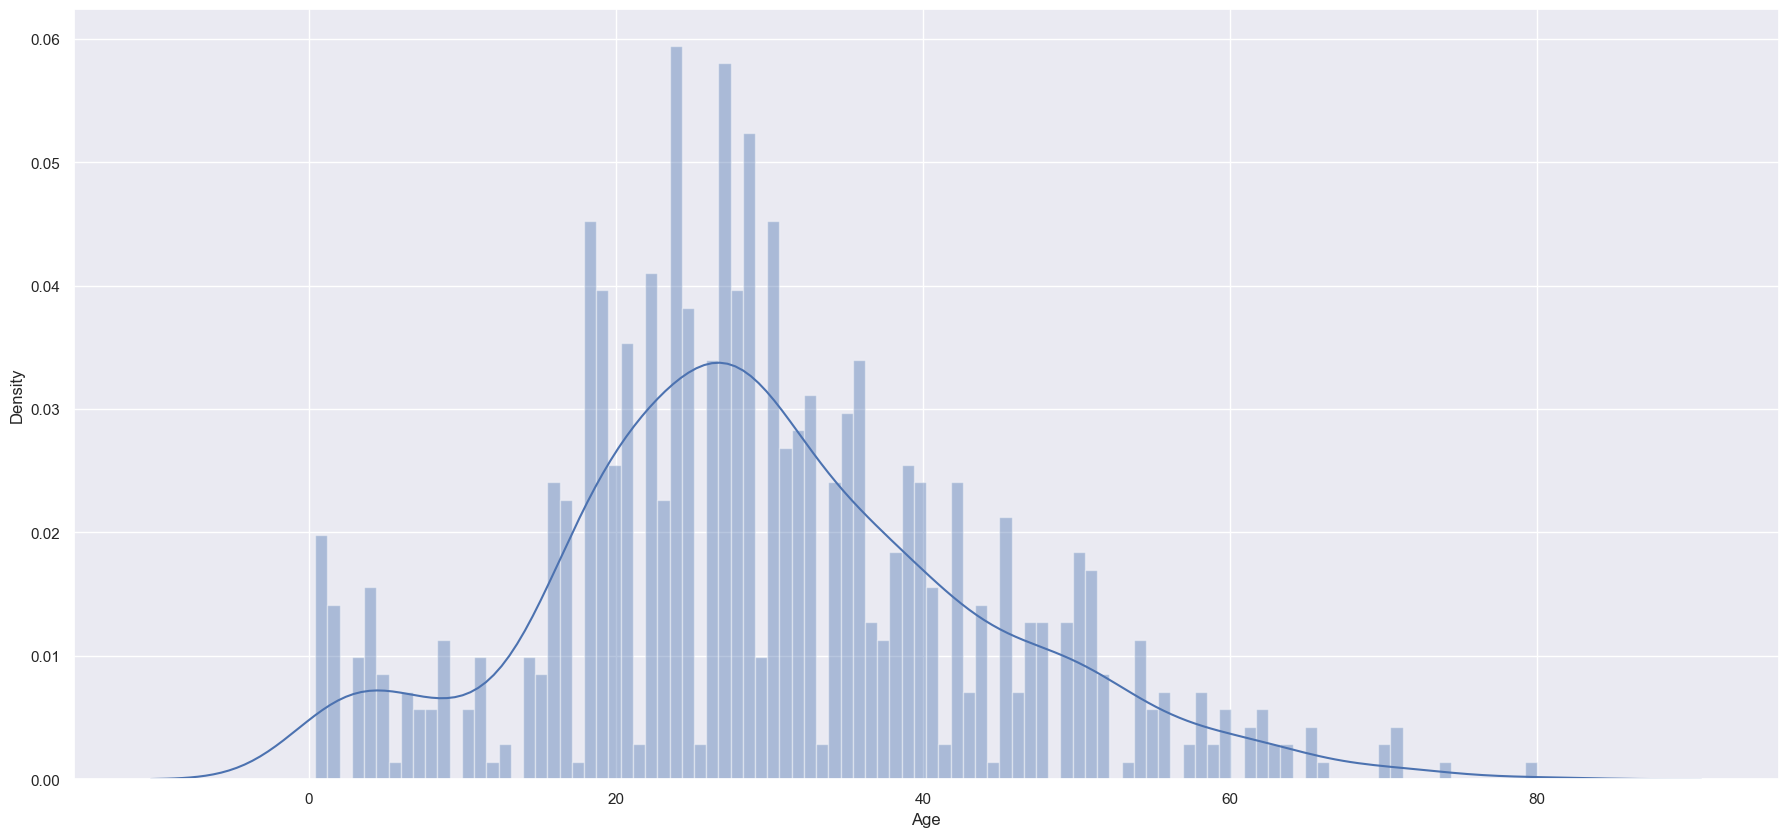

In [213]:
## Let's look at the the age distribution
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

## age_group

In [214]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

# Pre-Modeling Tasks

Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

P.S. In our test dataset, we do not have a dependent variable feature. We are to predict that using machine learning models.

In [215]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [216]:
X

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,22.00000,1,1,0,0,3.62500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.00000,0,1,0,0,35.64165,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,26.00000,0,0,0,1,7.92500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.00000,0,1,0,0,26.55000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,35.00000,1,0,0,1,8.05000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,1,0,0,1,13.00000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
887,19.00000,0,0,0,1,30.00000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
888,10.00882,0,1,2,0,5.86250,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
889,26.00000,1,0,0,1,30.00000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the training data

There are multiple ways of splitting data. They are...

- train_test_split.
- cross_validation.

In [217]:
X

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,22.00000,1,1,0,0,3.62500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.00000,0,1,0,0,35.64165,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,26.00000,0,0,0,1,7.92500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.00000,0,1,0,0,26.55000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,35.00000,1,0,0,1,8.05000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,1,0,0,1,13.00000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
887,19.00000,0,0,0,1,30.00000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
888,10.00882,0,1,2,0,5.86250,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
889,26.00000,1,0,0,1,30.00000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=0)

In [219]:
X_train

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.500000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.550000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
849,41.996000,0,1,0,0,44.552100,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.125000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.500000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,32.000000,1,0,0,1,56.495800,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
192,19.000000,0,1,0,0,3.927100,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
630,80.000000,1,0,0,1,30.000000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
560,32.467597,1,0,0,1,7.750000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
print(len(X_train))
print(len(X_test))

594
294


## Feature Scaling

Feature scaling is an important concept of machine learning models. Often times a dataset contain features highly varying in magnitude and unit. For some machine learning models, it is not a problem. However, for many other ones, its quite a problem. Many machine learning algorithms uses euclidian distances to calculate the distance between two points, it is quite a problem. Let's again look at a the sample of the train dataset below.

In [221]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
98,1,34.000000,0,0,1,0,11.50,0,0,0,...,1,0,0,0,0,0,0,0,0,0
210,0,24.000000,1,0,0,1,7.05,0,0,1,...,0,0,0,0,0,0,0,0,0,0
648,0,38.068321,1,0,0,1,7.55,0,0,1,...,0,0,1,0,0,0,0,0,0,0
883,0,28.000000,1,0,0,1,10.50,0,0,1,...,1,0,0,0,0,0,0,0,0,0
466,0,28.527814,1,0,0,1,0.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Here Age and Calculated_fare is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking Age and Calculated_fare have higher weight than other features. Therefore, we need to do feature scaling to get a better result.

we will use Standard Scaler to feature scale our dataset.

In [222]:
headers = X_train.columns 

In [223]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [224]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.258941,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,5.223573,-0.286299,-0.200699
1,1.117023,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
2,0.902628,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
3,-0.881333,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699
4,-0.809963,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699


# Modeling the Data

## Logistic Regression

In [225]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )
## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing.

### Evaluating a classification model
There are multiple ways to evaluate a classification model.

- Confusion Matrix.
- ROC Curve
- AUC Curve.

#### Confusion Matrix

In [226]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,149,28
Survived,30,87


In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8027210884353742

In [228]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7435897435897436

In [229]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7565217391304347

In [230]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



### AUC & ROC Curve

0.8354821575160558


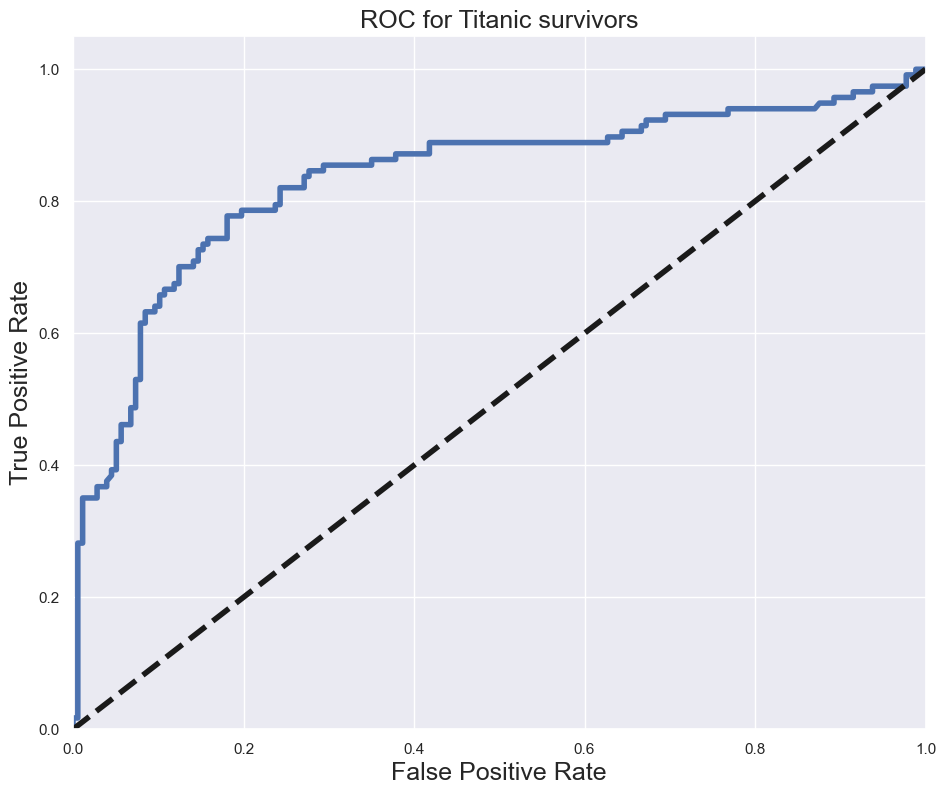

In [231]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

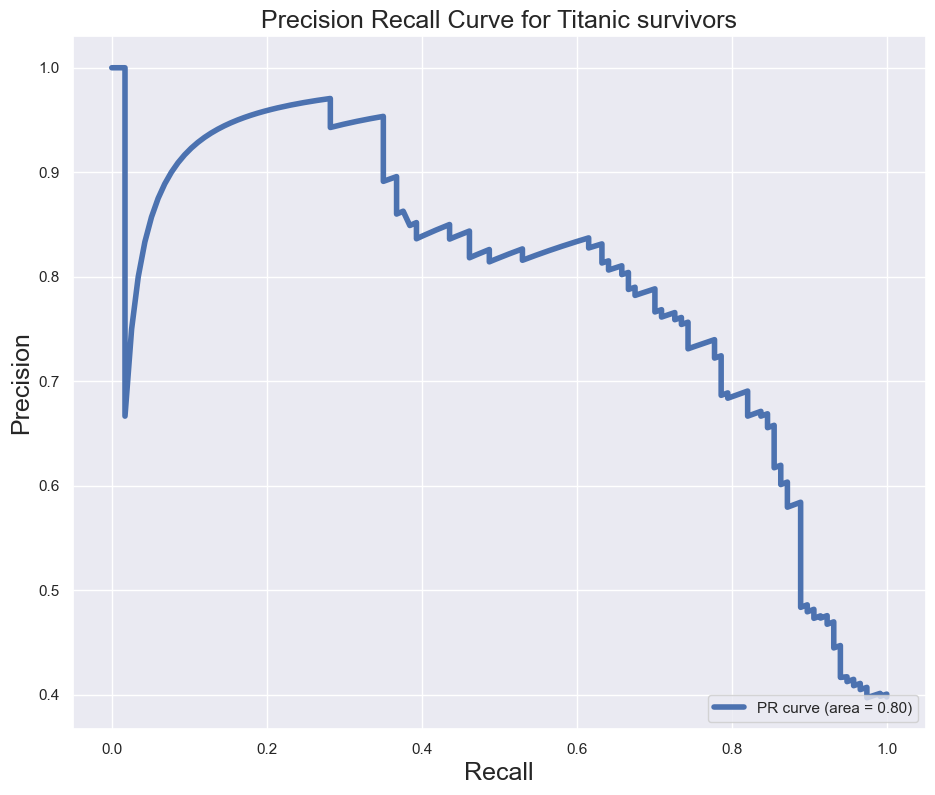

In [232]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Using Cross-validation:

In [233]:
sc = st_scale

In [234]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.81531532 0.84684685 0.81081081 0.84684685 0.82882883 0.82432432
 0.80630631 0.85585586 0.82432432 0.81981982]
Mean Cross-Validation accuracy score: 0.82793


In [235]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [236]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8193693693693694
{'C': 7, 'penalty': 'l2'}
LogisticRegression(C=7)


In [237]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8412162162162162

## K-Nearest Neighbor classifier(KNN)

In [238]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.81531532 0.80630631 0.78378378 0.8018018  0.81081081 0.81081081
 0.78828829 0.79279279 0.76576577 0.82432432]
Mean Cross-Validation accuracy score: 0.8


In [239]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.7477477477477478, 0.7788288288288289, 0.7945945945945946, 0.7887387387387387, 0.8, 0.8018018018018018, 0.7959459459459459, 0.7932432432432432, 0.8013513513513514, 0.7918918918918919, 0.7981981981981983, 0.7914414414414415, 0.795945945945946, 0.7923423423423424, 0.8009009009009007, 0.7851351351351352, 0.7887387387387388, 0.777927927927928, 0.7887387387387388, 0.7806306306306305, 0.7864864864864864, 0.777027027027027, 0.7851351351351351, 0.7752252252252252, 0.777927927927928, 0.7653153153153154, 0.7675675675675675, 0.7599099099099099, 0.7635135135135136, 0.7554054054054056]

Mean accuracy score: 0.7835885885885886


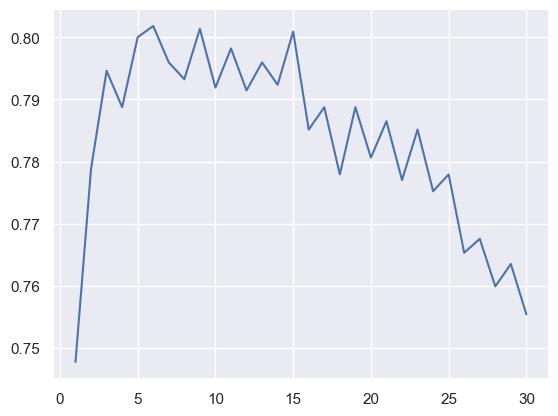

In [240]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [241]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [242]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8067415730337079
{'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=7)


In [243]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8524774774774775

## Gaussian Naive Bayes

In [244]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


## Support Vector Machines(SVM)

In [245]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [246]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.845318352059925
{'C': 2, 'gamma': 0.001}
SVC(C=2, gamma=0.001, probability=True)


In [247]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8265765765765766

## Decision Tree Classifier

In [248]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [249]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 29}
0.8336111111111112
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=29)


In [250]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8581081081081081

## Random Forest Classifier

In [251]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

C:\Users\Himanshu Soam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(max_features='auto'), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [252]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8441947565543071
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 160}
RandomForestClassifier(max_depth=5, max_features='auto', n_estimators=160)


In [253]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8513513513513513

## Bagging Classifier

In [254]:
X

array([[-0.55443205,  0.73779931,  0.43062749, ..., -0.1933473 ,
        -0.2992834 , -0.18043874],
       [ 0.60054282, -1.35538212,  0.43062749, ..., -0.1933473 ,
        -0.2992834 , -0.18043874],
       [-0.26568833, -1.35538212, -0.47552704, ..., -0.1933473 ,
        -0.2992834 , -0.18043874],
       ...,
       [-1.42002654, -1.35538212,  0.43062749, ..., -0.1933473 ,
        -0.2992834 , -0.18043874],
       [-0.26568833,  0.73779931, -0.47552704, ..., -0.1933473 ,
        -0.2992834 , -0.18043874],
       [ 0.16742724,  0.73779931, -0.47552704, ..., -0.1933473 ,
        -0.2992834 , -0.18043874]])

In [255]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [256]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8153558052434458
{'n_estimators': 70}
BaggingClassifier(base_estimator=None, n_estimators=70)


In [257]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9887387387387387

# Submit test predictions

In [258]:
all_models = [logreg_grid,
              knn_grid, 
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [259]:
test.to_numpy()

array([[34.5       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [47.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [62.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [38.5       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [23.24598951,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.24002825,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [260]:
test_prediction = (max(c, key=c.get)).predict(test.to_numpy())
submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": test_prediction
    })

In [261]:
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [262]:
tock = perf_counter()

In [263]:
print(f'This notebook took {round((tock-tick)/60, 2)} mins to run')

This notebook took 2.5 mins to run
